#  Funciones de Bessel

Darío Mitnik

In [1]:
from numpy import diag,  linspace, array ,arange
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show
from numpy import pi,sqrt,zeros,sin,cos

    
%matplotlib inline

import time
from __future__ import division

In [2]:
# Funciones de Bessel (recursivo)

def Bessel(k,l,r):
    rho = k*r

    if rho==0.0:
        jl = 0
        if l==0:
            jl=1
        return jl

    j0 = sin(rho) / rho
    j1 = sin(rho)/(rho**2) - cos(rho)/rho

    if l==0:
         return j0
    
    if l==1:
        return j1    
    
    for j in range(1,l):
        jl = (2*l-1)/rho*j1 - j0
        j1 = jl
        j0 = j1

    return jl


In [3]:
# Funciones de Neumann (recursivo)

def Neumann(k,l,r):
    rho = k*r
    n0 = -cos(rho) / rho
    n1 = -cos(rho)/(rho**2) - sin(rho)/rho
   
    if l==0:
        return n0
    
    if l==1:
         return n1    
    
    for j in range(1,l):
        nl = (2*l-1)/rho*n1 - n0
        n1 = nl
        n0 = n1

    return nl


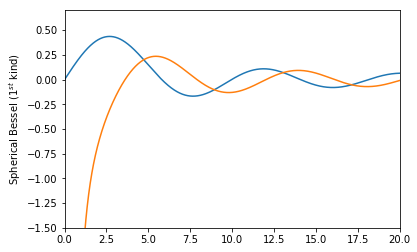

In [4]:
# Plot

# Parámetros

step=0.01
xmin=step
xmax=20
x=arange(xmin,xmax,step) #arange: Return evenly spaced values within a given interval
nsize = len(x)
ener= 0.3
k = sqrt(2*ener)
lq=1 #Esto es el l cuantico

jl=zeros(nsize)
nl=zeros(nsize)

for i in range(nsize):
  jl[i]= Bessel(k,lq,x[i])
  nl[i]= Neumann(k,lq,x[i])

plot(x,jl[:])
plot(x,nl[:])
ylabel("Spherical Bessel (1$^{st}$ kind)")
axis([xmin,xmax,-1.5,0.7])
show()

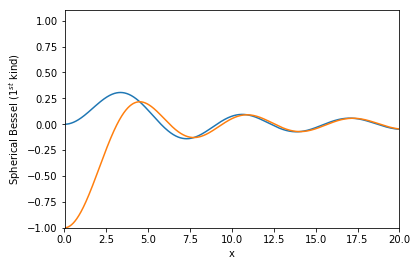

In [5]:
# Asymptotic jl

ener= 0.5
k = sqrt(2*ener)
lq=2

jl=zeros(nsize)
jlasy=zeros(nsize)

for i in range(nsize):
  jl[i]= Bessel(k,lq,x[i])
  jlasy[i] = sin(k*x[i] - lq*pi/2)/(k*x[i])

plot(x,jl[:])
plot(x,jlasy[:])
xlabel("x")
ylabel("Spherical Bessel (1$^{st}$ kind)")
axis([xmin,xmax,-1,1.1])
show()

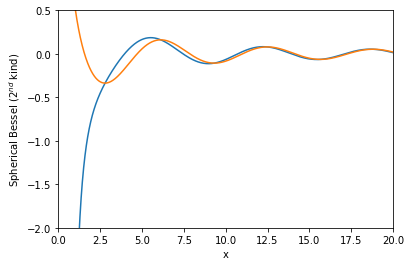

In [6]:
# Asymptotic nl

ener= 0.5
k = sqrt(2*ener)
lq=2

nl=zeros(nsize)
nlasy=zeros(nsize)

for i in range(nsize):
  nl[i]= Neumann(k,lq,x[i])
  nlasy[i] = -cos(k*x[i] - lq*pi/2)/(k*x[i])

plot(x,nl[:])
plot(x,nlasy[:])
xlabel("x")
ylabel("Spherical Bessel (2$^{nd}$ kind)")
axis([xmin,xmax,-2,0.5])
show()

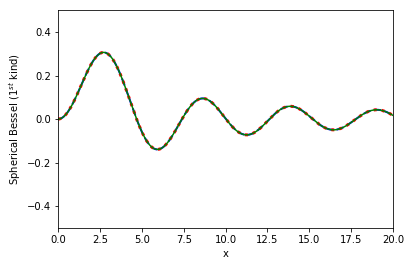

In [7]:
# Comparison with Scipy Special Functions

import scipy.special as spl 
import numpy as np

k=1.2294221585
lq=2

jl2=np.zeros(nsize)
jln=np.zeros(nsize)

for i in range(nsize):
    jl[i]= Bessel(k,lq,x[i])
    jl2[i] = np.sqrt(np.pi/(2*k*x[i]) ) * spl.jn(lq+0.5,k*x[i])
    A = spl.spherical_jn(lq,k*x[i],derivative=False)
    #Tuve que usar spl.spherical_jn en vez de spl.sph_jn, por el tema de la version del scipy
    #derivative=False, para que no me devuelva la derivada (no la uso)
    jln[i] = A
    #Uso el A, sin el [lq]
   
plot(x,jl,color='blue',linestyle='dashed',linewidth=2)
plot(x,jl2,color='red',linestyle='dotted',linewidth=3)
plot(x,jln,color='green',linestyle='solid')

axis([xmin,xmax,-0.5,0.5])
xlabel("x")
ylabel("Spherical Bessel (1$^{st}$ kind)")
show()

In [8]:
# Solución por Diagonalización

In [9]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [10]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [17]:
from numpy import diag,  linspace, array
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step=0.1
xmin=step
xmax=20
x=arange(xmin,xmax,step)
nsize = len(x)
 
# array defined above
nsize = len(x)
Dx = step

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


# Kinetic (T) and Potential (V)
T = -0.5*Laplacian(x)
lq = 2
V =  lq*(lq+1)/(2 * x * x)

# Hamiltonian
H =  T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)


# Normalization
U=Normalizate(U,x)


E=: 0.20245790939421712
E=: 0.34265808173915346
E=: 0.5039562119412819
E=: 0.688447145324278
E=: 0.8967067880836673


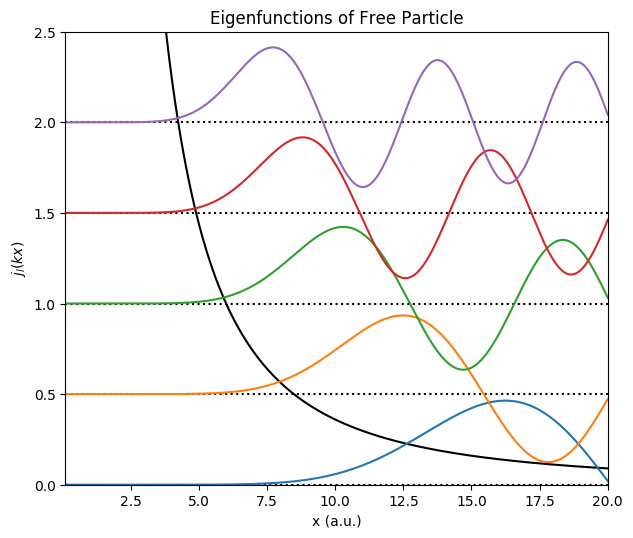

In [18]:
# Plot


#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 5

# Plot the potential
plot(x,V,color='k')

# Plot wavefunctions
ebase=-0.5
for i in range(nfunctions):
    ebase=ebase+0.5
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E=:",E[i])
axis([xmin,xmax,0,2.5])
title("Eigenfunctions of Free Particle")
xlabel("x (a.u.)")
ylabel("$j_l(k x)$")
show()

In [59]:

# Normalización de vector

def Norm1d(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    
    suma = 0.0
    for i in range(0,n):
        suma = suma + U[i]**2
        
    suma = suma*h
    rnorm = 1/sqrt(suma)
    
       
#       Normalization
    rsign = 1
    if U[1] < 0:
        rsign = -1
    rnorm = rnorm * rsign
        
    for i in range(0,n):
        U[i] = U[i]*rnorm
         
       
    return  U

0.6130047009644064


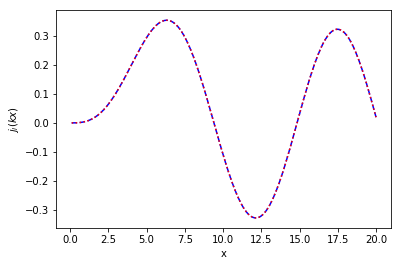

In [61]:
# Comparison

nq = 2
ener= E[nq]
k = sqrt(2*ener)
lq=2
print(k)

jl=zeros(nsize)

for i in range(nsize):
  jl[i]= Bessel(k,lq,x[i]) *k * x[i]

jl = Norm1d(jl,x)

plot(x,jl,'blue',linestyle='dashed')
plot(x,U[:,nq],'red',linestyle='dotted')
xlabel("x")
ylabel("$j_l(k x)$")

#axis([xmin,xmax,-0.5,0.5])
show()